<a href="https://colab.research.google.com/github/Chaitanya0786/2311cs020451/blob/main/Ad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##1) mention about problem statement
##2) talk about columns
##3) install the models and required libraries
##4) understand the data
##5) EDA
##6) i)univariate analysis
##ii)Bi-variate analysis
##iii)Multivariate analysis
##7)check the null-values or missing values
##i)trating the null-valuesnor missing values
##ii)drop null values if they are less than 5%
##8)check the duplicates
##i)drop duplicates
##9)treating the outliers
##i)check the outliers
##ii)remove outlieres
##iii)make the boxplot before and after the outliers
##10)Feature engineering
##a)i)Extract the features
##  ii)create the features
##  iii)select the features
##b)checking the multicoliniarity
## i)heat map
## ii)vif technique
##c)transformation
##  i)one hot encoding or label emcoding
##  ii)X-y features split
##12)train test split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/online_course_recommendation_v2.csv')
df.head()

user_id  course_id                       course_name       instructor  \
0    15796       9366              Python for Beginners      Emma Harris   
1      861       1928   Cybersecurity for Professionals  Alexander Young   
2    38159       9541  DevOps and Continuous Deployment   Dr. Mia Walker   
3    44733       3708   Project Management Fundamentals   Benjamin Lewis   
4    11285       3361       Ethical Hacking Masterclass     Daniel White   

   course_duration_hours certification_offered difficulty_level  rating  \
0                   39.1                   Yes         Beginner     5.0   
1                   36.3                   Yes         Beginner     4.3   
2                   13.4                   Yes         Beginner     3.9   
3                   58.3                   Yes         Beginner     3.1   
4                   30.8                   Yes         Beginner     2.8   

   enrollment_numbers  course_price  feedback_score study_material_available  \
0               21600        317.50           0.797                      Yes   
1               15379         40.99           0.770                      Yes   
2                6431        380.81           0.772                      Yes   
3               48245        342.80           0.969                       No   
4               34556        381.01           0.555                      Yes   

   time_spent_hours  previous_courses_taken  
0             17.60                       4  
1             28.97                       9  
2             52.44                       4  
3             22.29                       6  
4             22.01                       5

In [3]:
df.tail()

user_id  course_id                           course_name  \
99995    10647       5466             Graphic Design with Canva   
99996    13800       2623   Stock Market and Trading Strategies   
99997    47131       1556  Networking and System Administration   
99998    49654       6001             Graphic Design with Canva   
99999    12929       5763             Graphic Design with Canva   

           instructor  course_duration_hours certification_offered  \
99995     Emma Harris                   17.3                   Yes   
99996  Dr. John Smith                   68.4                   Yes   
99997  Dr. John Smith                   73.8                   Yes   
99998    Daniel White                   30.3                   Yes   
99999    Daniel White                   67.0                    No   

      difficulty_level  rating  enrollment_numbers  course_price  \
99995         Beginner     3.9               49101        485.34   
99996         Beginner     3.5               35107        162.80   
99997         Beginner     4.3               12146         24.02   
99998         Beginner     3.5                9933        402.24   
99999         Beginner     2.3                3479        135.61   

       feedback_score study_material_available  time_spent_hours  \
99995           0.838                      Yes             16.35   
99996           0.922                      Yes             41.94   
99997           0.990                      Yes             15.87   
99998           0.630                      Yes             21.05   
99999           0.753                      Yes              8.63   

       previous_courses_taken  
99995                       3  
99996                       7  
99997                       5  
99998                       4  
99999                       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [5]:
df.describe()

user_id      course_id  course_duration_hours         rating  \
count  100000.000000  100000.000000           100000.00000  100000.000000   
mean    24935.663570    5006.863560               52.38354       3.959859   
std     14406.960108    2882.085456               27.42347       0.729958   
min         1.000000       1.000000                5.00000       1.000000   
25%     12487.750000    2523.000000               28.60000       3.500000   
50%     24793.500000    5012.000000               52.40000       4.000000   
75%     37382.250000    7502.000000               76.10000       4.500000   
max     49999.000000    9999.000000              100.00000       5.000000   

       enrollment_numbers   course_price  feedback_score  time_spent_hours  \
count       100000.000000  100000.000000   100000.000000     100000.000000   
mean         25052.822850     261.073369        0.746865         20.691054   
std          14388.188356     139.013758        0.143683         13.669148   
min             50.000000      20.000000        0.092000          1.000000   
25%          12583.750000     140.100000        0.649000          9.900000   
50%          25057.500000     262.310000        0.750000         19.920000   
75%          37522.000000     381.702500        0.851000         30.080000   
max          49999.000000     500.000000        1.000000         84.150000   

       previous_courses_taken  
count           100000.000000  
mean                 4.992670  
std                  2.237259  
min                  0.000000  
25%                  3.000000  
50%                  5.000000  
75%                  6.000000  
max                 19.000000

In [6]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [7]:
df.duplicated().sum()

0

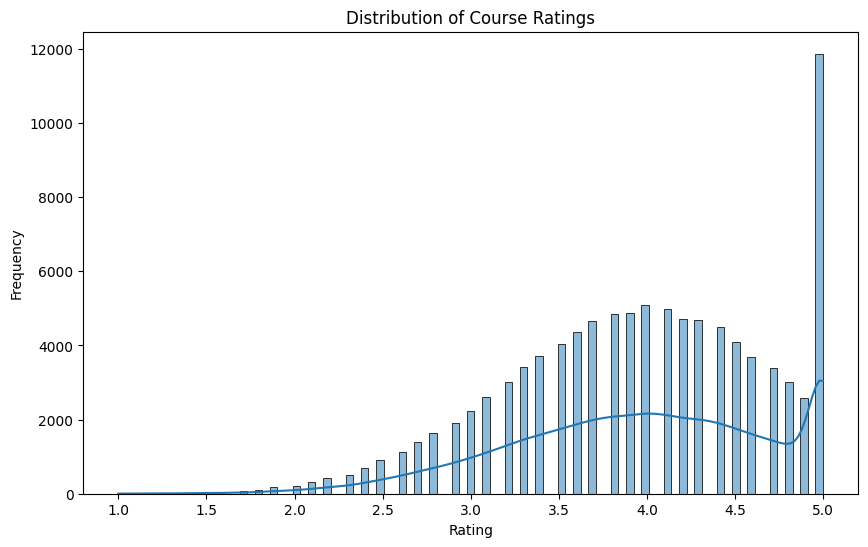

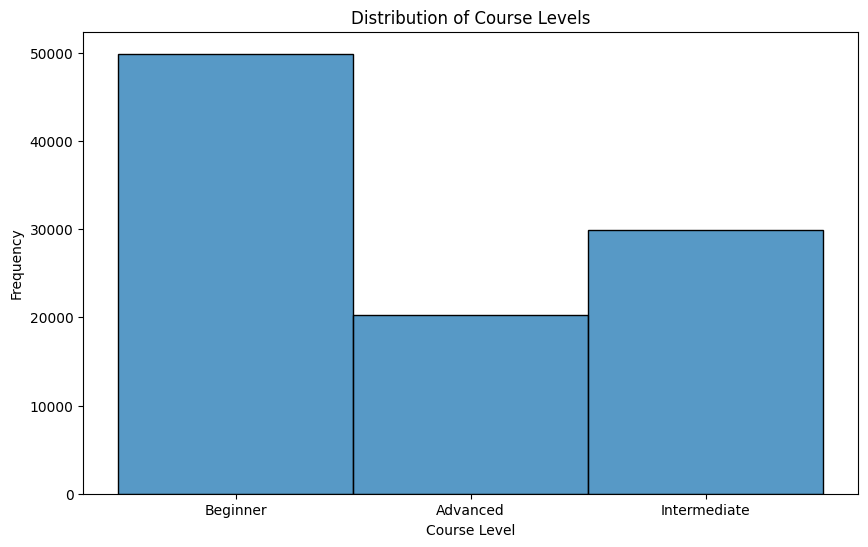

In [8]:
# prompt: histplots

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame as defined in the previous code.

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True) # Example with 'Rating' column
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Example with another column (replace 'Column_Name' with an actual column)
plt.figure(figsize=(10, 6))
sns.histplot(df['difficulty_level'], kde=False) # Example without KDE for categorical data
plt.title('Distribution of Course Levels')
plt.xlabel('Course Level')
plt.ylabel('Frequency')
plt.show()

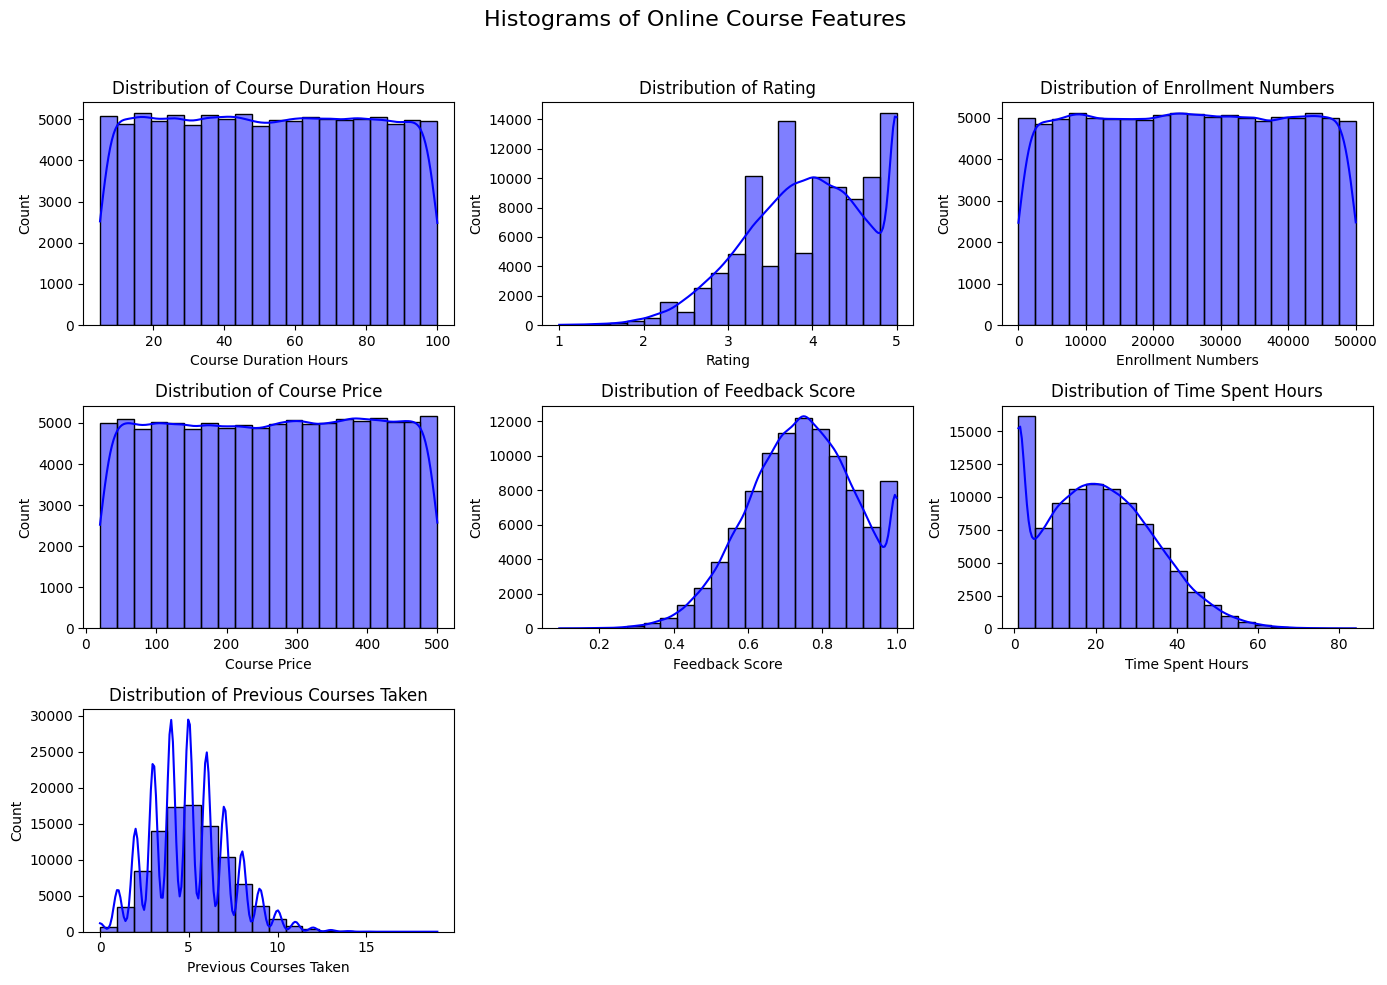

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set figure size
plt.figure(figsize=(14, 10))
plt.suptitle("Histograms of Online Course Features", fontsize=16)

# Select relevant numerical columns for histograms
features = ["course_duration_hours", "rating", "enrollment_numbers", "course_price", "feedback_score", "time_spent_hours", "previous_courses_taken"]

# Plot histograms
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.histplot(df[col], bins=20, kde=True, color="blue")  # KDE adds a smooth density curve
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=12)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()
print

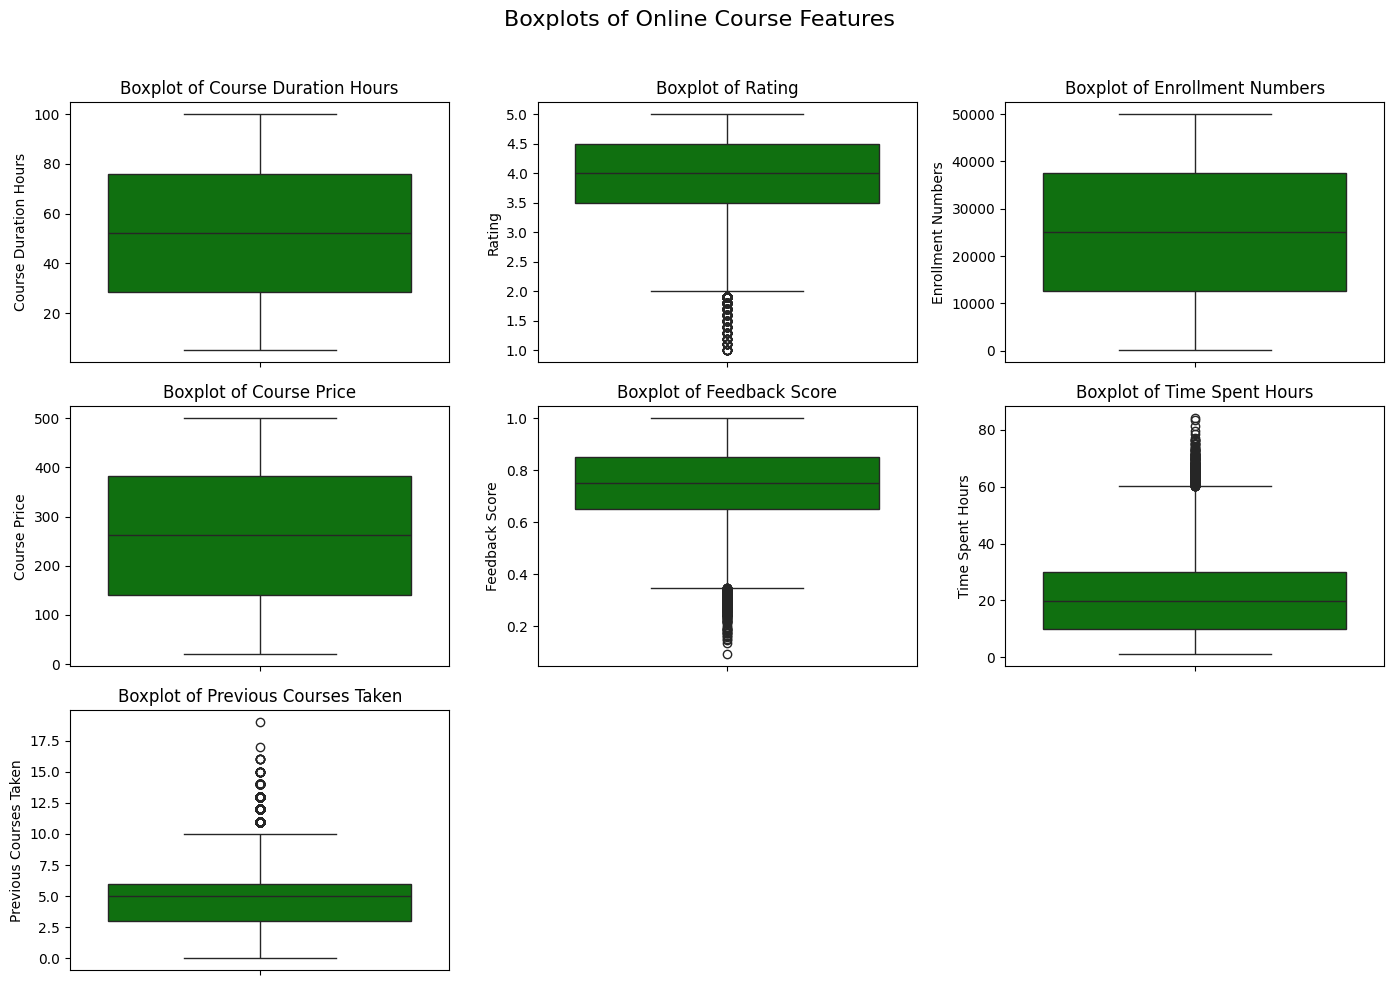

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows to verify dataset loading

# Set figure size
plt.figure(figsize=(14, 10))
plt.suptitle("Boxplots of Online Course Features", fontsize=16)

# Select relevant numerical columns for boxplots
features = ["course_duration_hours", "rating", "enrollment_numbers",
            "course_price", "feedback_score", "time_spent_hours", "previous_courses_taken"]

# Plot boxplots
for i, col in enumerate(features):
    if col not in df.columns:
        print(f"Skipping {col}: Column not found in dataset")
        continue

    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.boxplot(y=df[col], color="green")  # Boxplot for each feature
    plt.title(f"Boxplot of {col.replace('_', ' ').title()}", fontsize=12)
    plt.ylabel(col.replace('_', ' ').title())

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


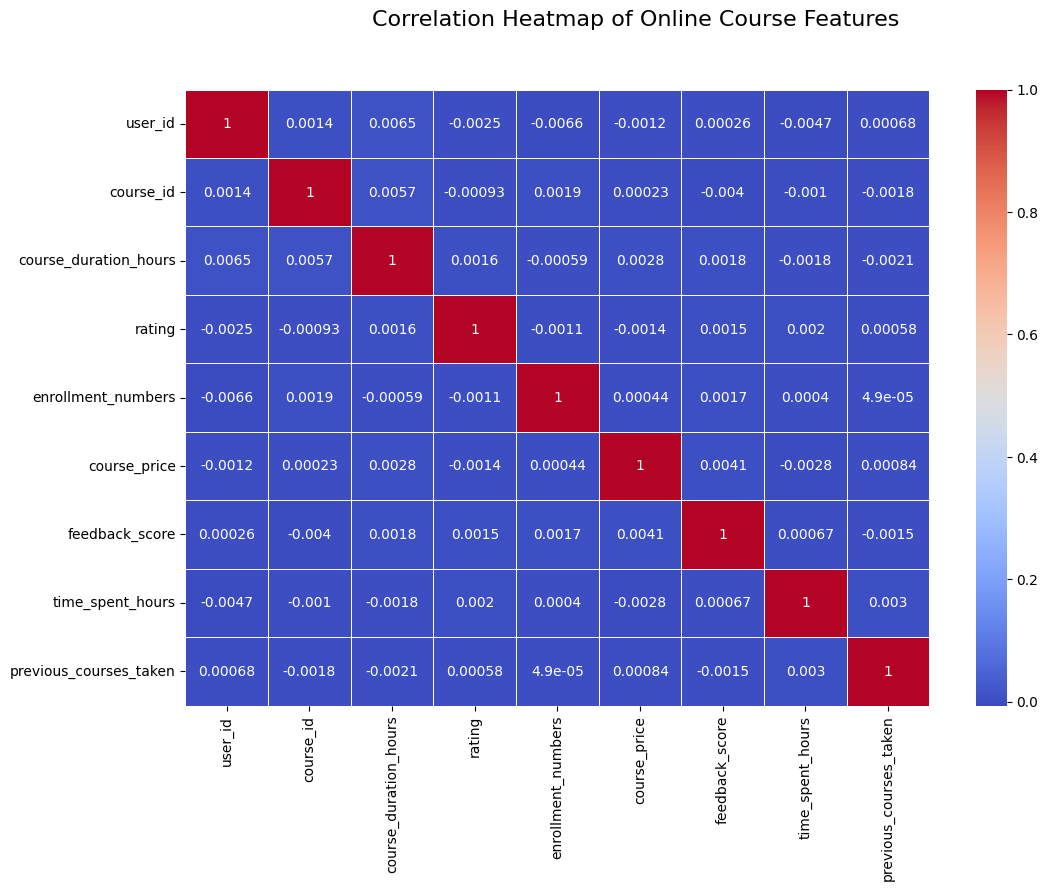

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))
plt.suptitle("Correlation Heatmap of Online Course Features", fontsize=16)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Show the heatmap
plt.show()


In [12]:
# prompt: remove outliers

import numpy as np
# Calculate the IQR for each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Remove outliers (modify as needed: replace, cap, etc.)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape


(97403, 14)

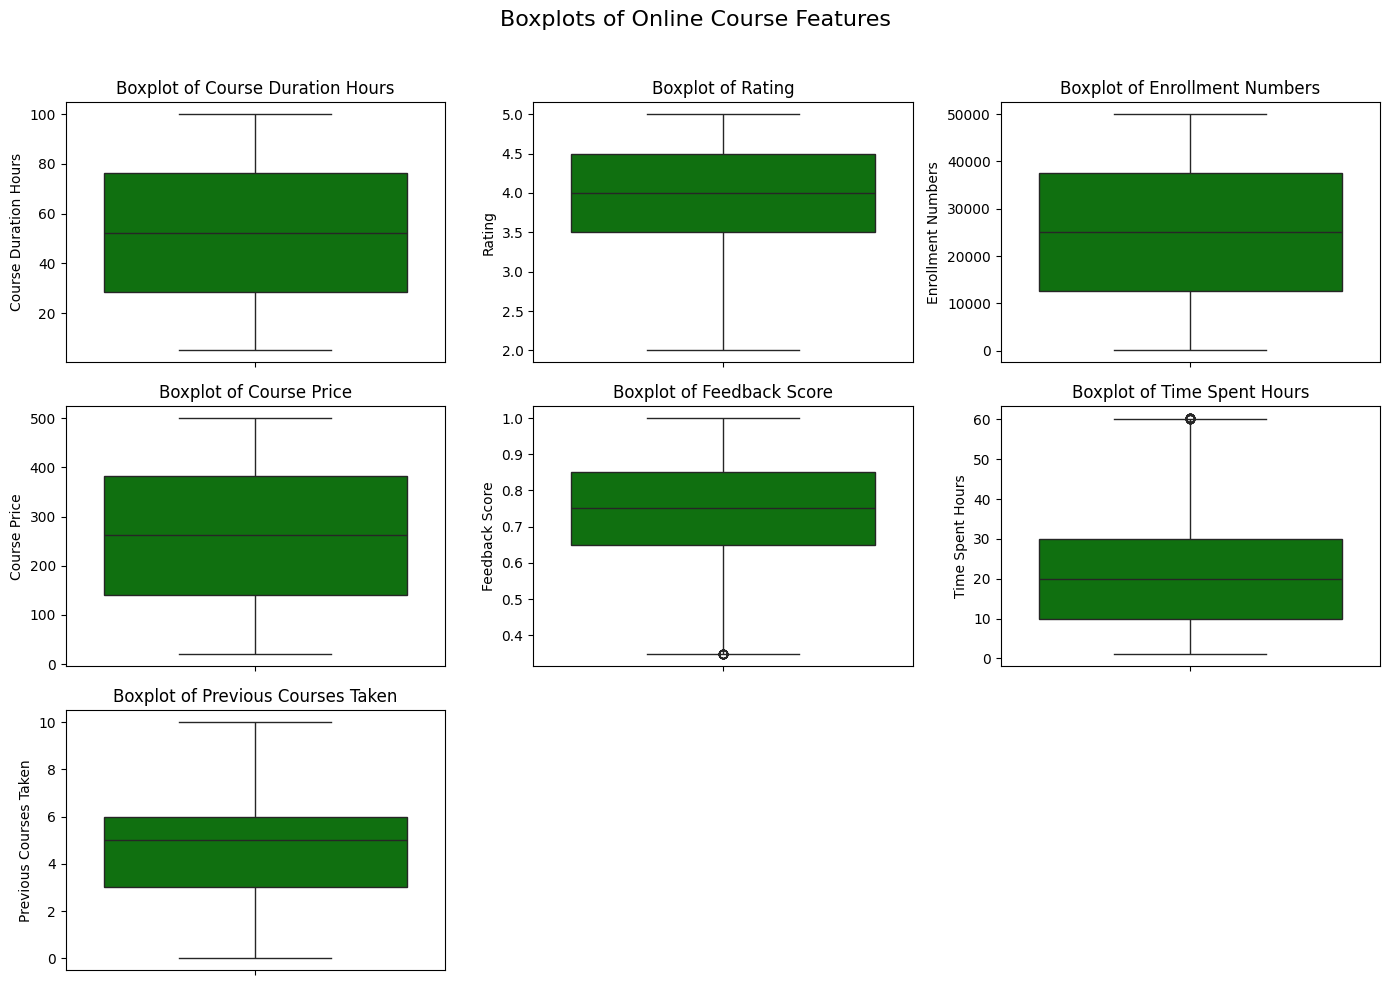

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows to verify dataset loading

# Set figure size
plt.figure(figsize=(14, 10))
plt.suptitle("Boxplots of Online Course Features", fontsize=16)

# Select relevant numerical columns for boxplots
features = ["course_duration_hours", "rating", "enrollment_numbers",
            "course_price", "feedback_score", "time_spent_hours", "previous_courses_taken"]

# Plot boxplots
for i, col in enumerate(features):
    if col not in df.columns:
        print(f"Skipping {col}: Column not found in dataset")
        continue

    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.boxplot(y=df[col], color="green")  # Boxplot for each feature
    plt.title(f"Boxplot of {col.replace('_', ' ').title()}", fontsize=12)
    plt.ylabel(col.replace('_', ' ').title())

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


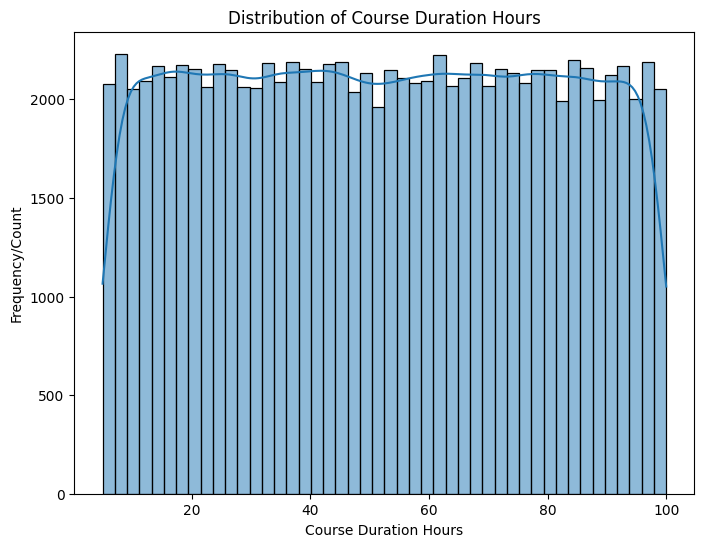

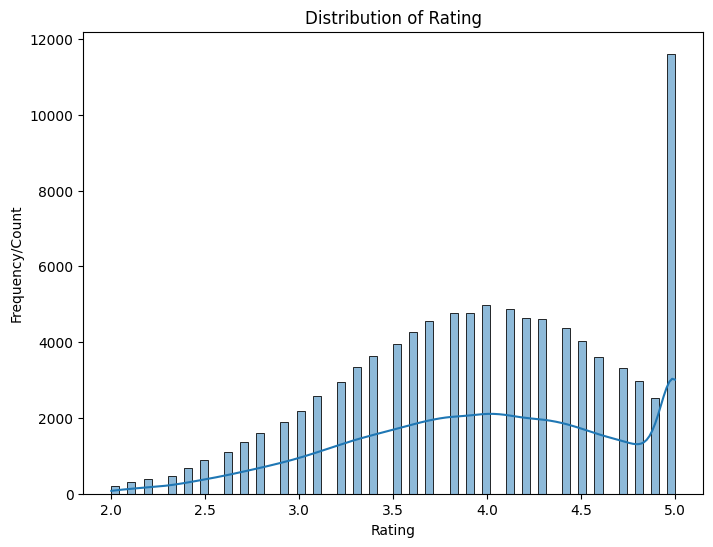

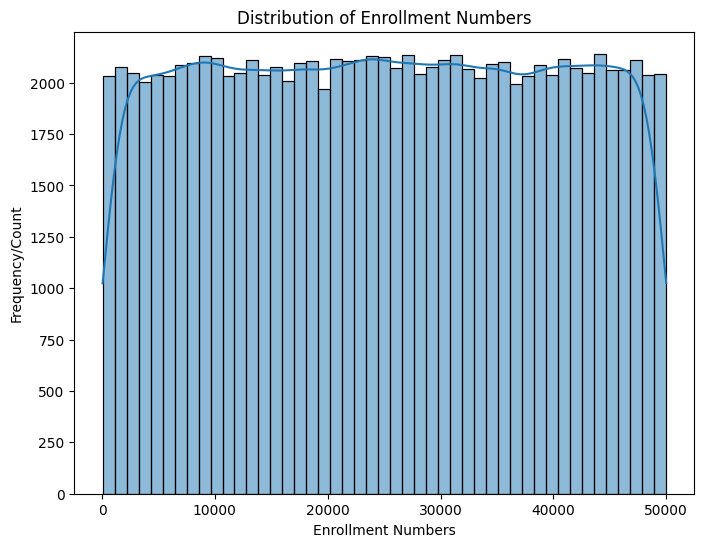

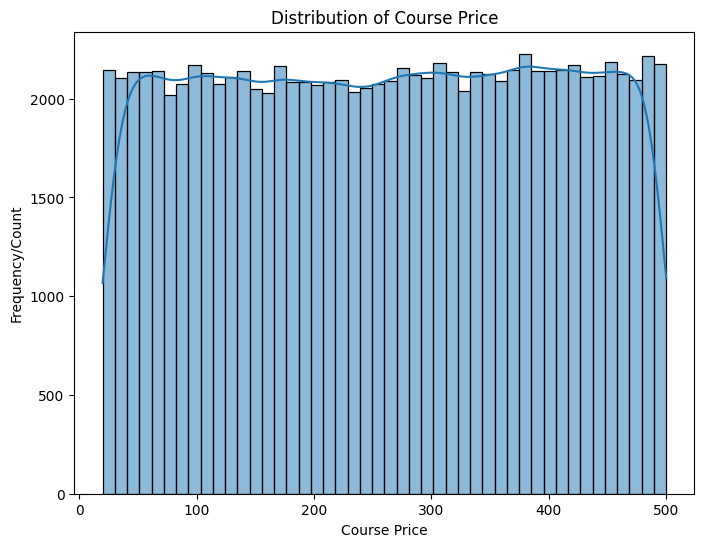

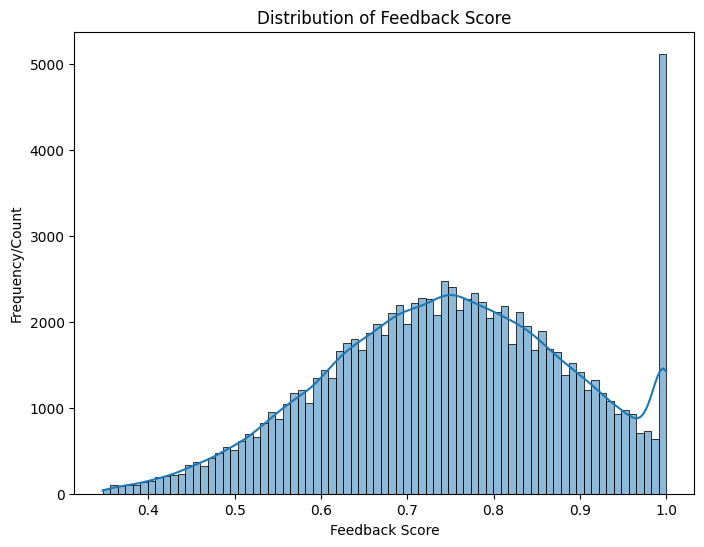

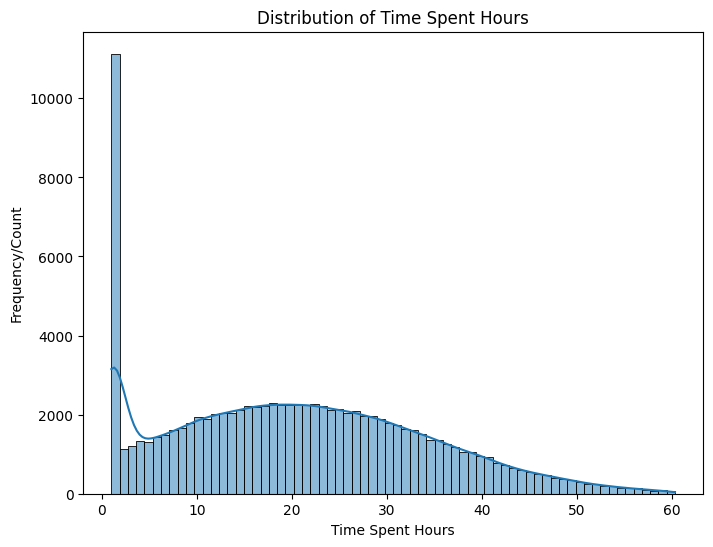

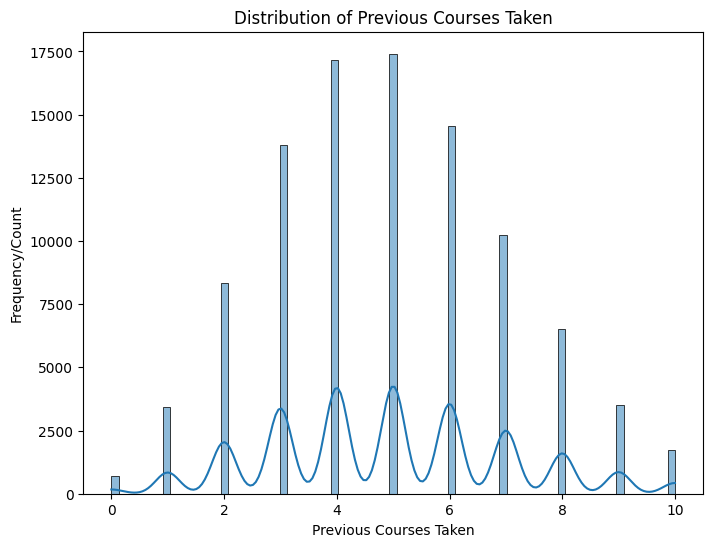

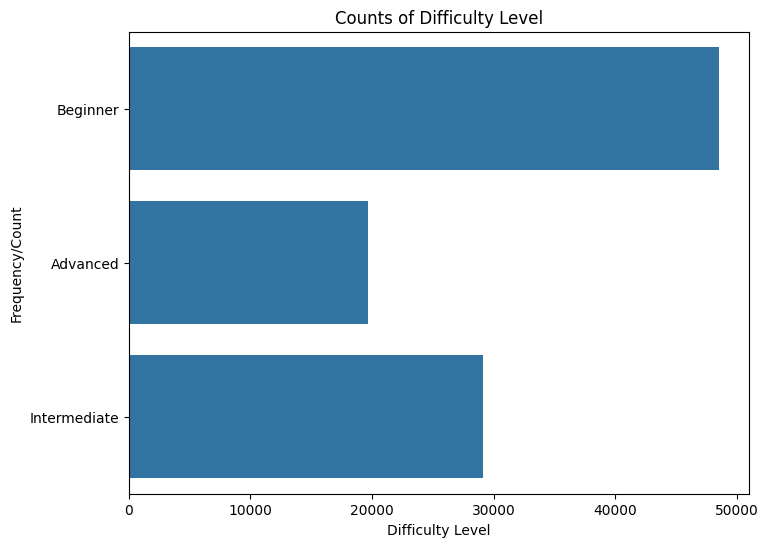

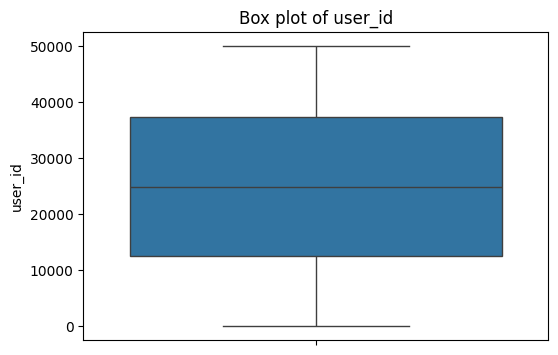

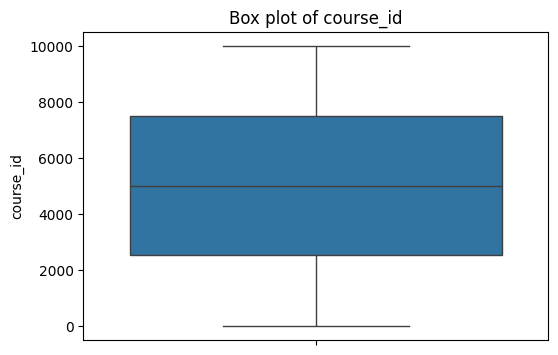

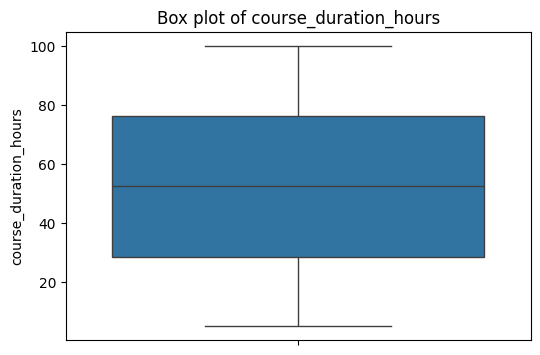

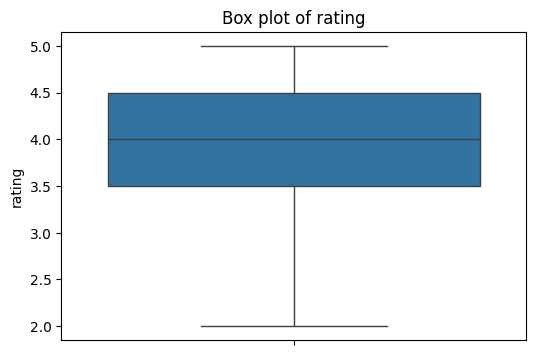

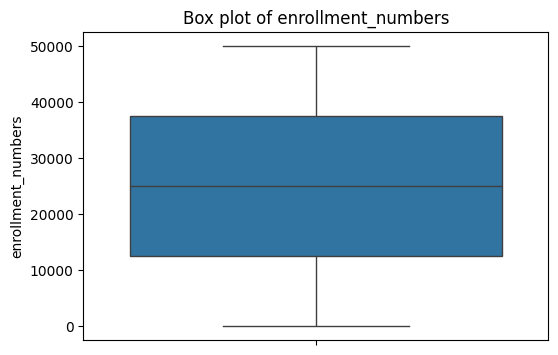

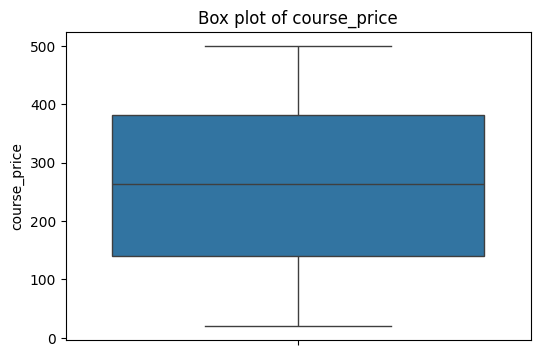

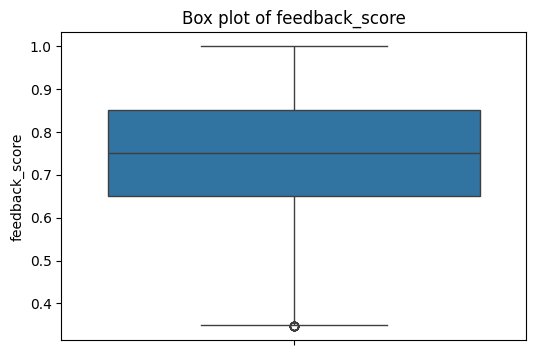

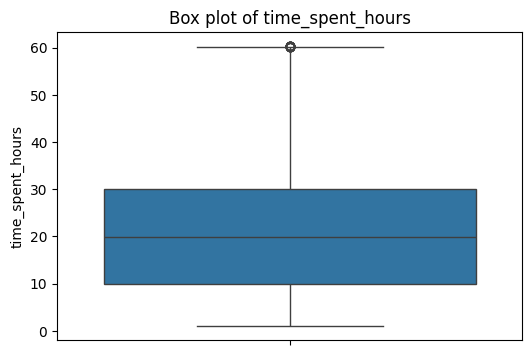

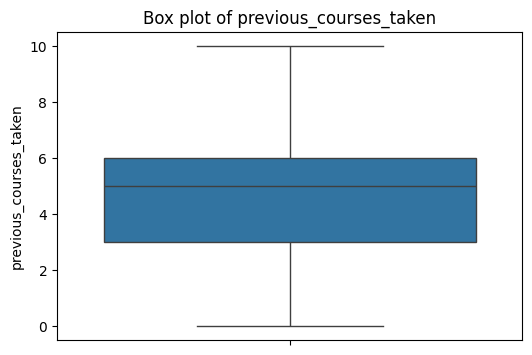

In [14]:
# prompt: univeriant graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code.
# ... (Your previous code for data loading and preprocessing)

# Univariate analysis plots for relevant features
features_for_univariate_analysis = ["course_duration_hours", "rating",
                                     "enrollment_numbers", "course_price",
                                     "feedback_score", "time_spent_hours",
                                     "previous_courses_taken", "difficulty_level"]

for col in features_for_univariate_analysis:
    if col not in df.columns:
        print(f"Skipping {col}: Column not found in dataset")
        continue

    plt.figure(figsize=(8, 6))

    if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    else:  # Treat as categorical
        sns.countplot(y=df[col])  # Use countplot for categorical features
        plt.title(f"Counts of {col.replace('_', ' ').title()}")

    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency/Count")
    plt.show()


# Box Plots for Numerical Columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
  plt.figure(figsize=(6, 4))
  sns.boxplot(y=df[col])
  plt.title(f'Box plot of {col}')
  plt.show()


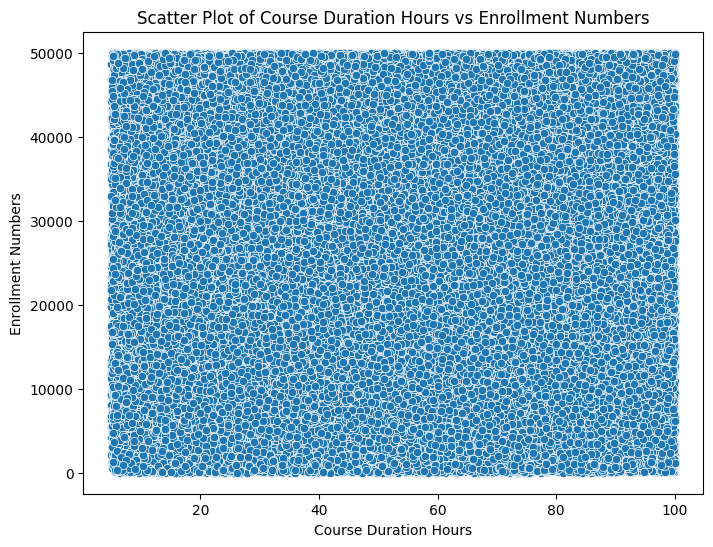

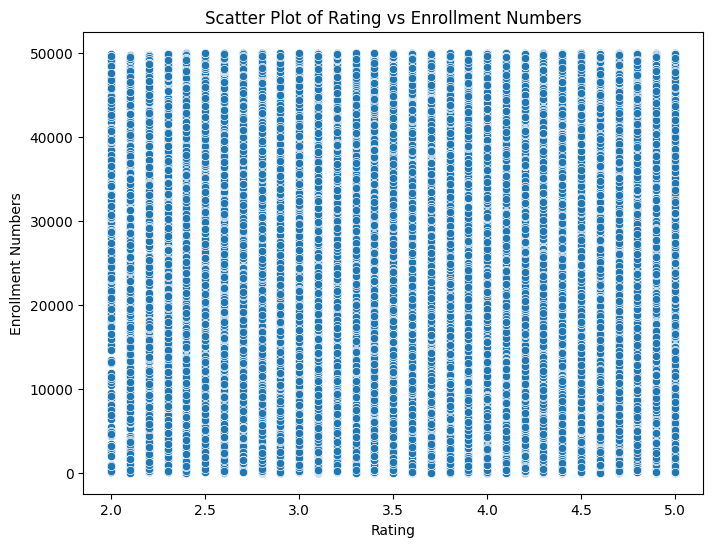

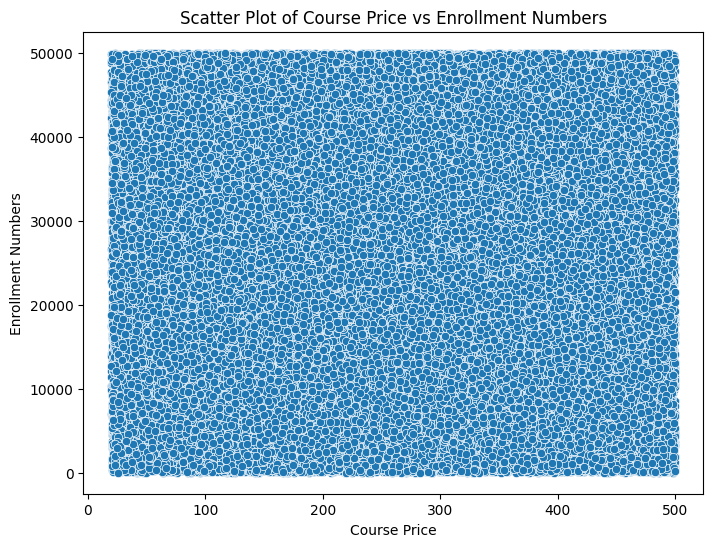

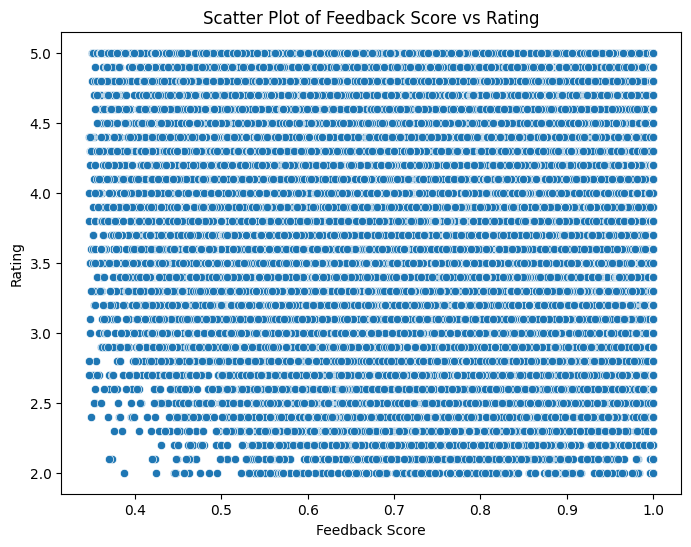

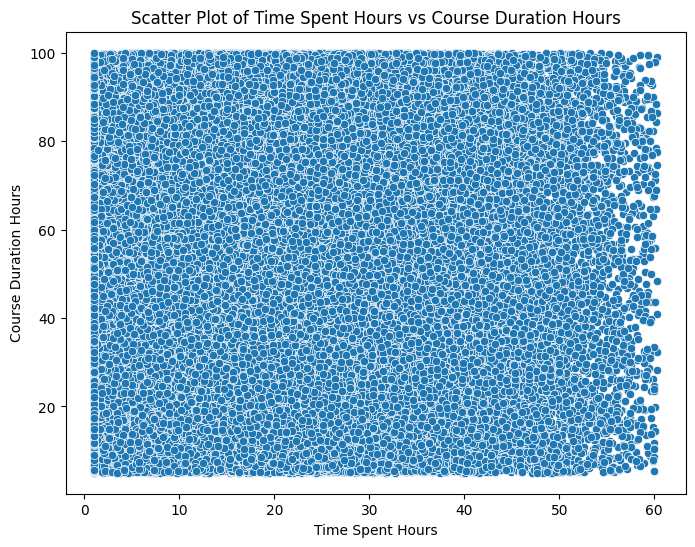

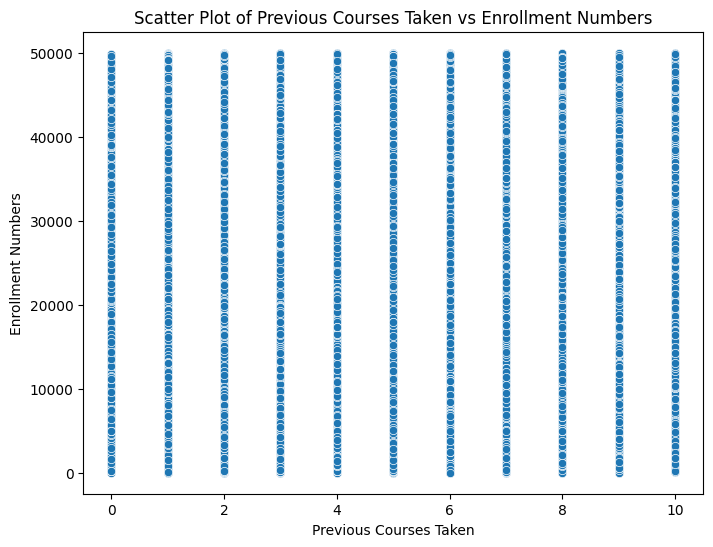

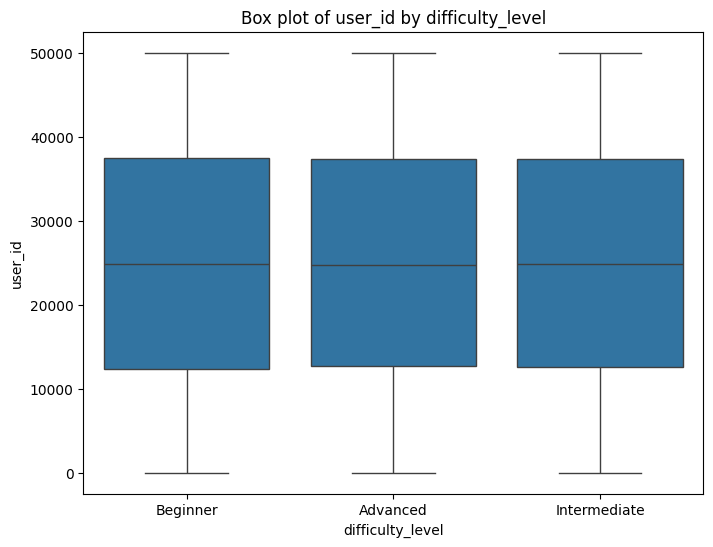

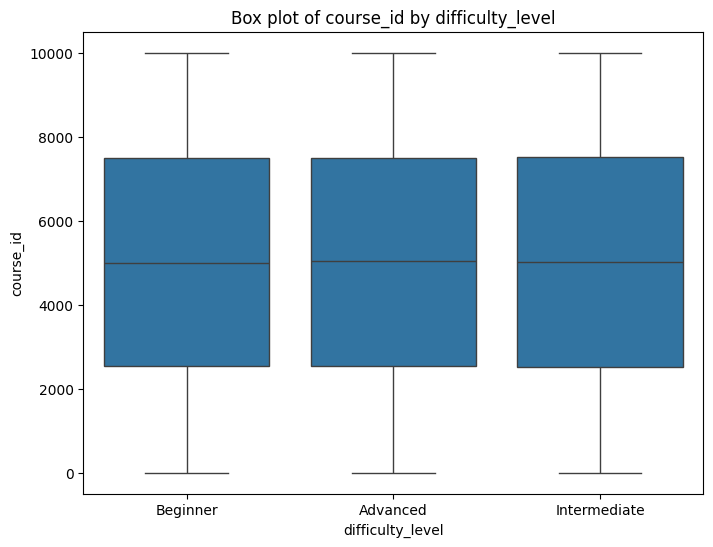

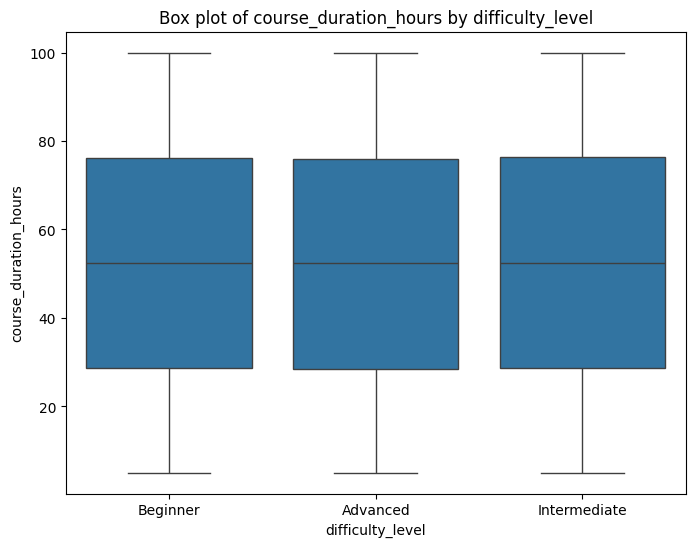

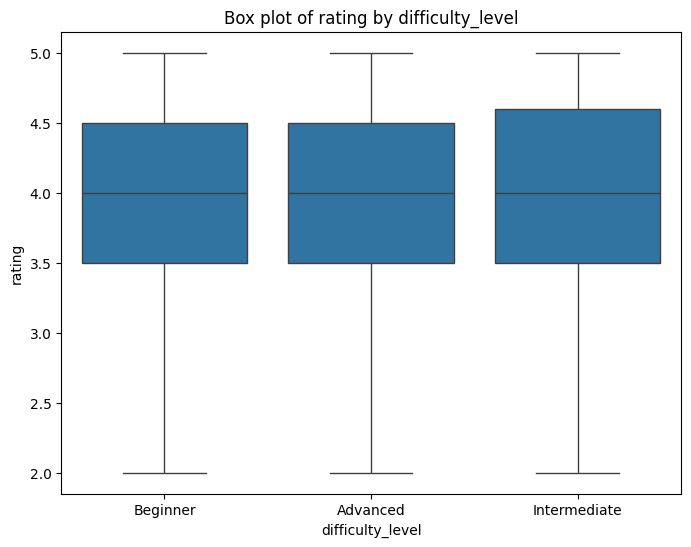

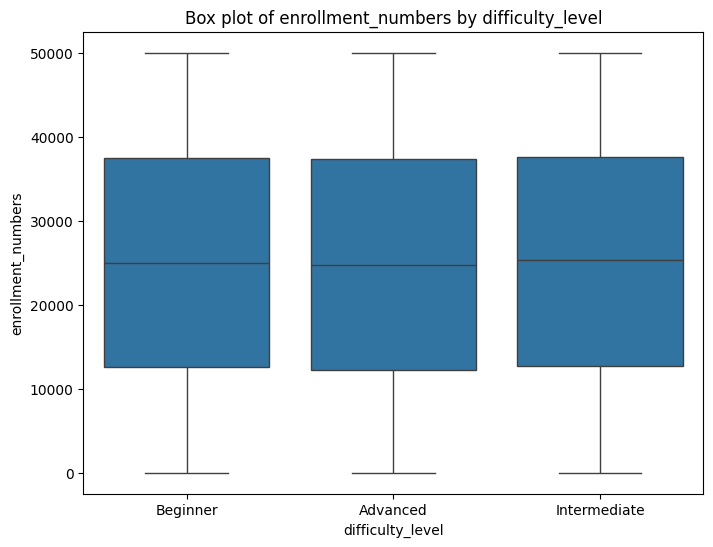

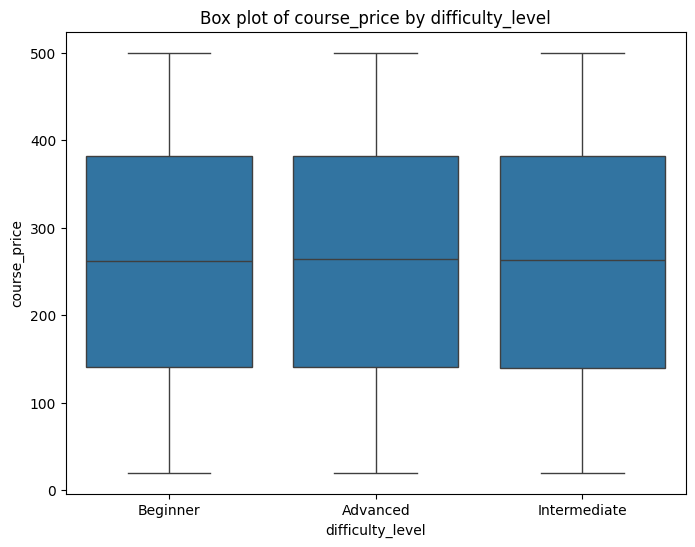

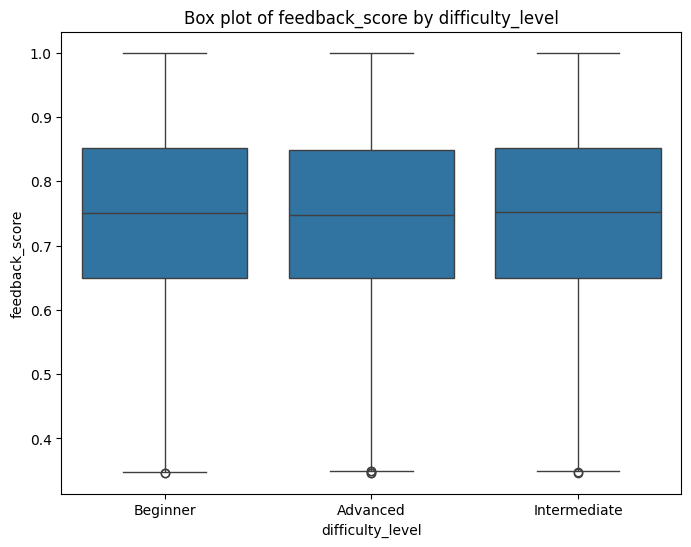

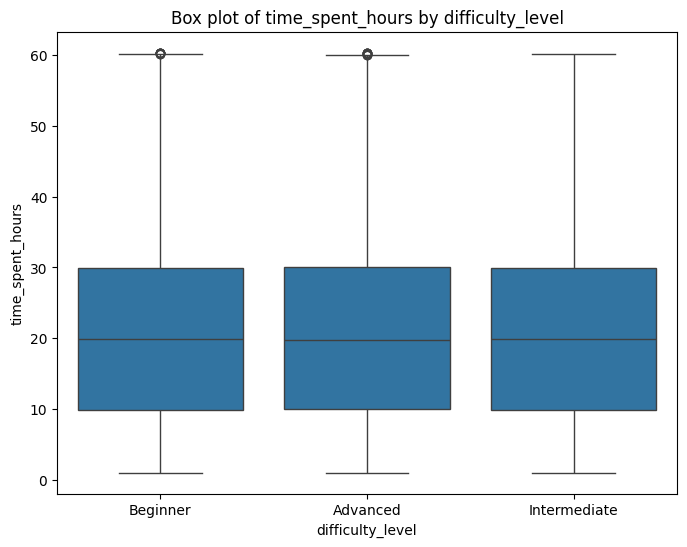

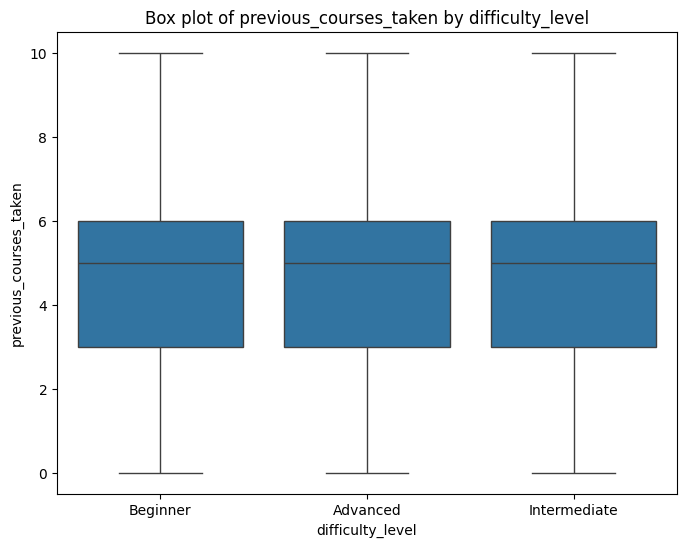

Skipping course_category: Column not found in dataset


In [15]:
# prompt: bivarient graphs

import matplotlib.pyplot as plt
# Bivariate Analysis: Scatter Plots

# Select pairs of features for scatter plots
feature_pairs = [
    ("course_duration_hours", "enrollment_numbers"),
    ("rating", "enrollment_numbers"),
    ("course_price", "enrollment_numbers"),
    ("feedback_score", "rating"),
    ("time_spent_hours", "course_duration_hours"),
    ("previous_courses_taken", "enrollment_numbers")
]

for col1, col2 in feature_pairs:
    if col1 not in df.columns or col2 not in df.columns:
        print(f"Skipping pair ({col1}, {col2}): One or both columns not found in dataset")
        continue

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f"Scatter Plot of {col1.replace('_', ' ').title()} vs {col2.replace('_', ' ').title()}")
    plt.xlabel(col1.replace('_', ' ').title())
    plt.ylabel(col2.replace('_', ' ').title())
    plt.show()


# Bivariate Analysis: Categorical vs Numerical (Box Plots)
categorical_cols = ["difficulty_level", "course_category"]  # Add other categorical columns if needed

for cat_col in categorical_cols:
  if cat_col not in df.columns:
    print(f"Skipping {cat_col}: Column not found in dataset")
    continue

  for num_col in numeric_cols:
    if num_col not in df.columns:
        print(f"Skipping {num_col}: Column not found in dataset")
        continue

    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[cat_col], y=df[num_col])
    plt.title(f'Box plot of {num_col} by {cat_col}')
    plt.show()


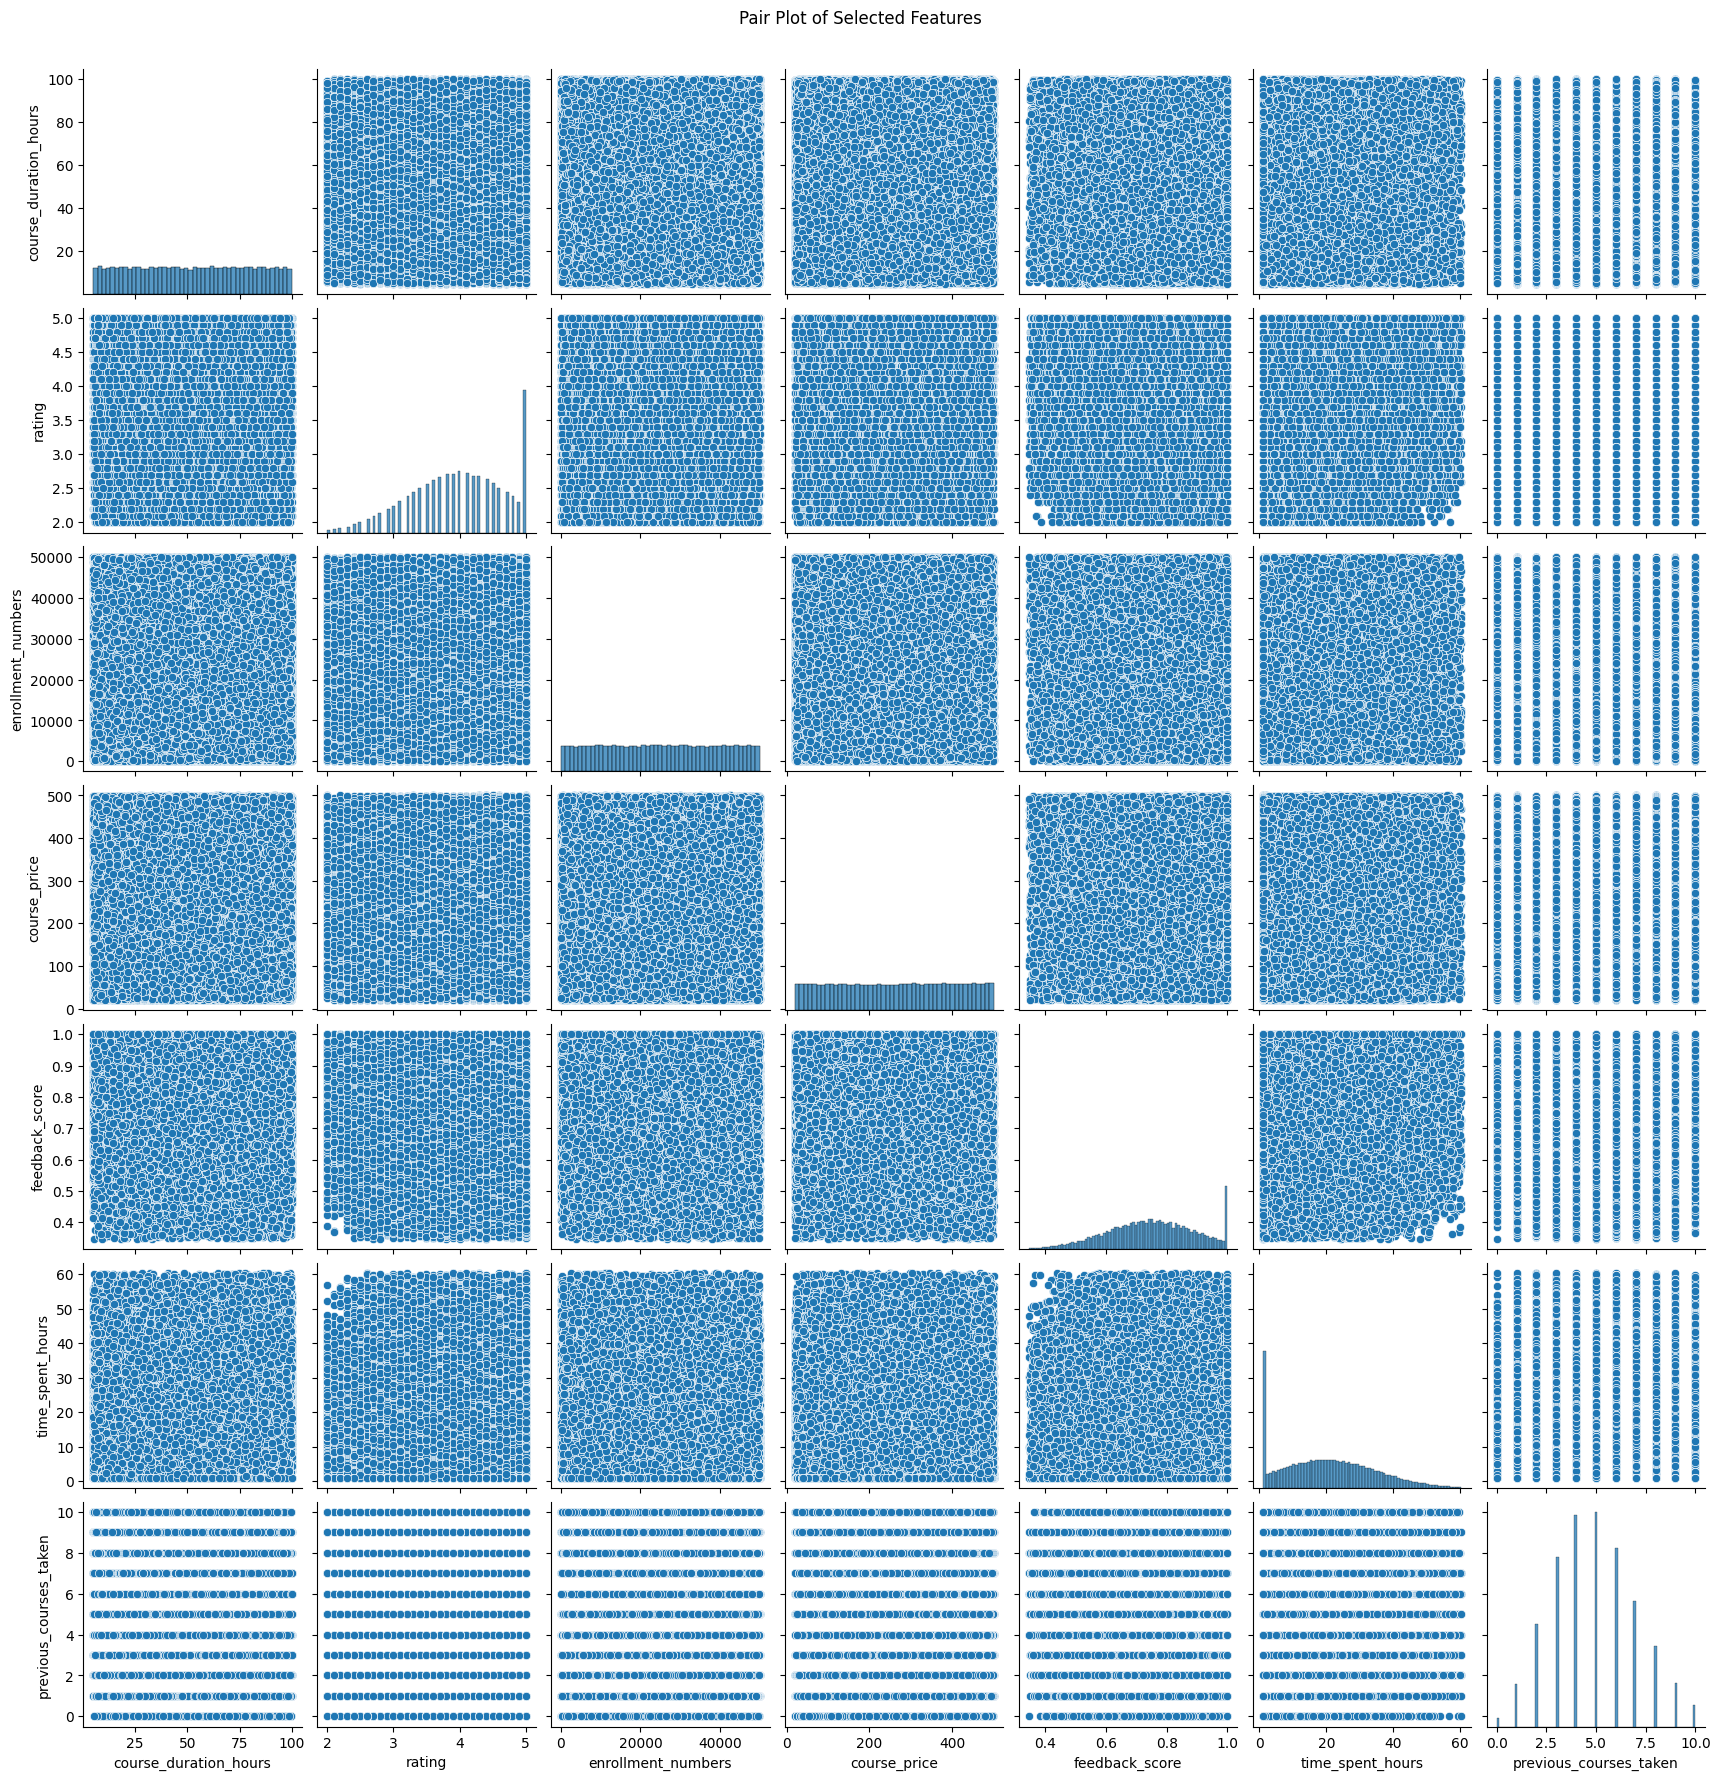

In [16]:
# prompt: mutlivariant graphs

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame as defined in the previous code.
# ... (Your previous code for data loading and preprocessing)

# Multivariate Analysis: Pair Plots
# Select relevant features for pair plot
features_for_pairplot = ["course_duration_hours", "rating", "enrollment_numbers",
                         "course_price", "feedback_score", "time_spent_hours",
                         "previous_courses_taken"]

# Create the pair plot
sns.pairplot(df[features_for_pairplot])
plt.suptitle("Pair Plot of Selected Features", y=1.02)  # Adjust title position
plt.show()
